In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reaction_1 = np.array([1, 0, 0])
reaction_2 = np.array([0, 1, 0])
reaction_3 = np.array([0, -2, 1])
reaction_4 = np.array([-1, 0, 0])
reaction_5 = np.array([0, -1, 0])

nu = np.array([reaction_1, reaction_2, reaction_3, reaction_4, reaction_5])

def propensity(x):
    return np.array([25, 1000*x[0], (1/1000)*x[1]*(x[1]-1), 0.1*x[0], x[2]])

Text(0, 0.5, 'Species Count')

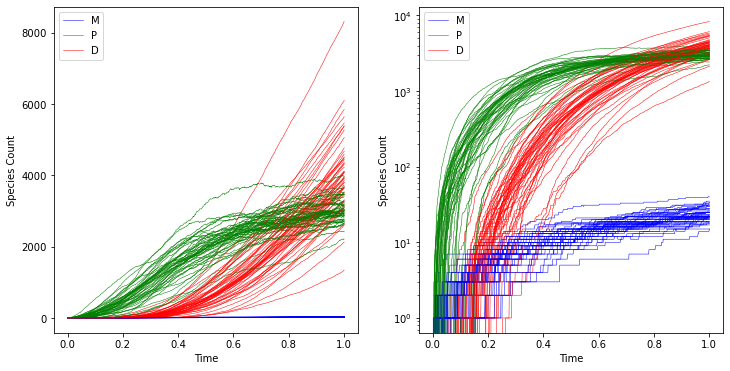

In [16]:
runs = 50

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for run in range(runs):
    #initialisation
    x = np.array([0, 0, 0])
    t = 0
    tau = 76.77229106339469e-05
    T = 1
    x_t = np.array([x])
    time = np.array([0])
    reaction_count = [0, 0, 0, 0, 0]
    # np.random.seed(42)

    #Tau_leap
    while(t < T):
        a = propensity(x)
        a0 = np.sum(a)
        lambdas = a*tau

        p = np.random.poisson(lambdas)
        
        weighted_sum = np.sum(nu * p[:, np.newaxis], axis=0)

        x = x + weighted_sum
        t = t + tau

        x_t = np.append(x_t, [x], axis = 0)
        time = np.append(time, t)

    M = x_t[:, 0]
    P = x_t[:, 1]
    D = x_t[:, 2]

    ax1.plot(time, M, color = 'blue', label = 'M', linewidth=0.5)
    ax1.plot(time, P, color = 'green', label = 'P', linewidth=0.5)
    ax1.plot(time, D, color = 'red', label = 'D', linewidth=0.5)
    
    ax2.plot(time, M, color='blue', label='M', linewidth=0.5)
    ax2.plot(time, P, color='green', label='P', linewidth=0.5)
    ax2.plot(time, D, color='red', label='D', linewidth=0.5)
    ax2.set_yscale('log')


ax1.legend(['M', 'P', 'D'])  
ax1.set_xlabel('Time')
ax1.set_ylabel('Species Count')

ax2.legend(['M', 'P', 'D'])  
ax2.set_xlabel('Time')
ax2.set_ylabel('Species Count')
